In [8]:
import kagglehub
import pandas as pd

# Завантажуємо датасет локально
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

# Читаємо CSV
df = pd.read_csv(f"{path}/credit_risk_dataset.csv")

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Загальний огляд

In [11]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nОпис статистики:")
display(df.describe(include="all"))

Shape: (32581, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [12]:
# Пропуски
print("\nКількість пропусків по колонках:")
print(df.isnull().sum())


Кількість пропусків по колонках:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [13]:
# Дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())


Кількість дублікатів: 165


# 3️⃣ Числові колонки

In [18]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("\nЧислові колонки:", num_cols)


Числові колонки: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


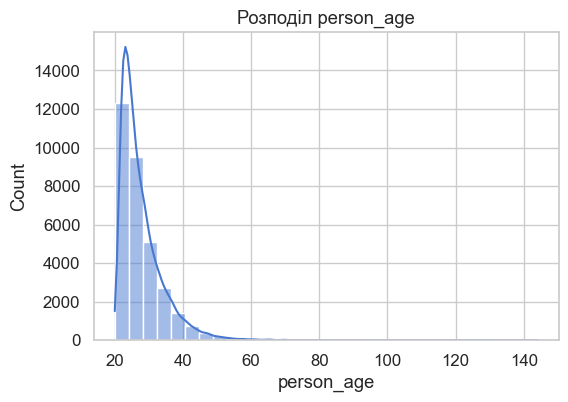

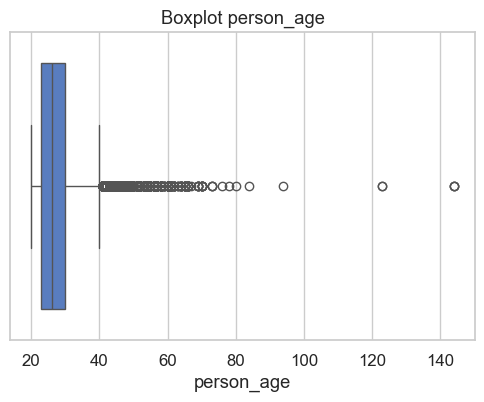

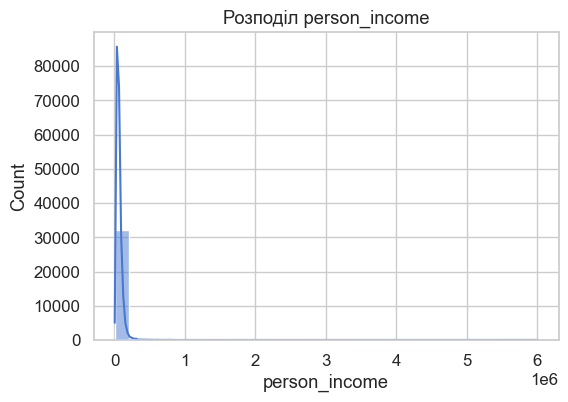

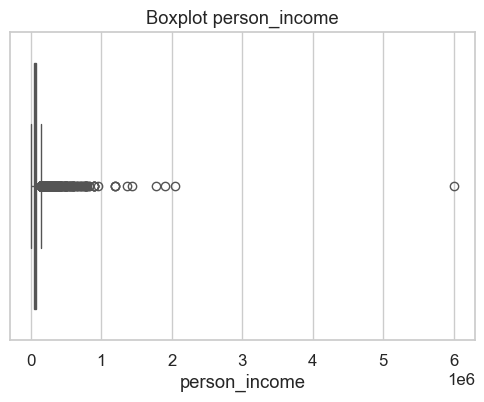

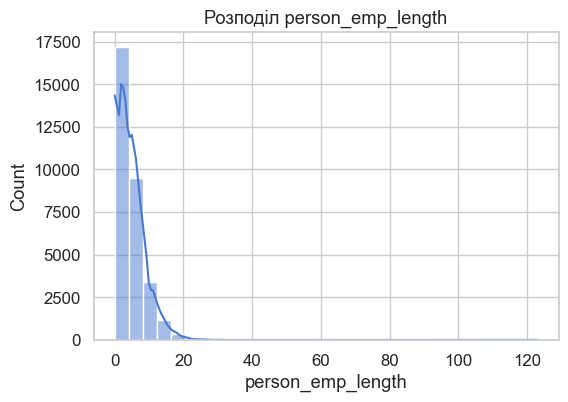

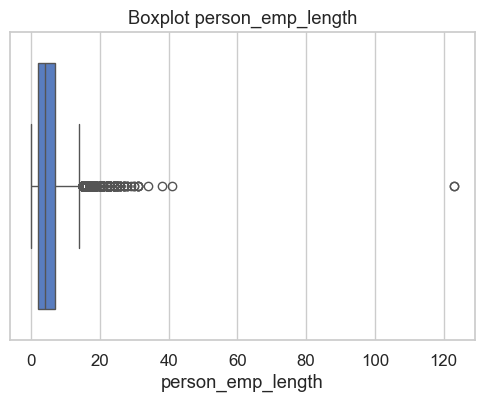

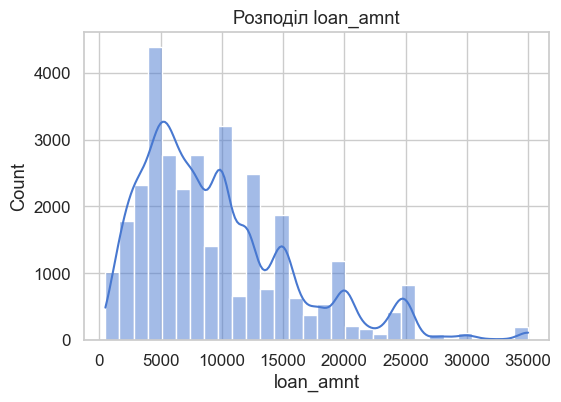

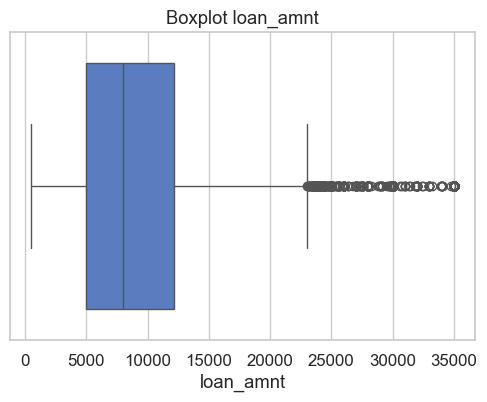

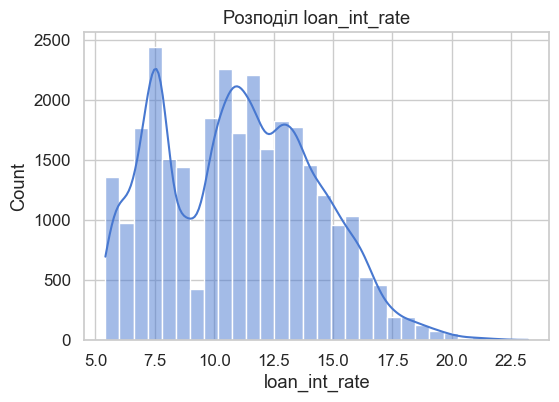

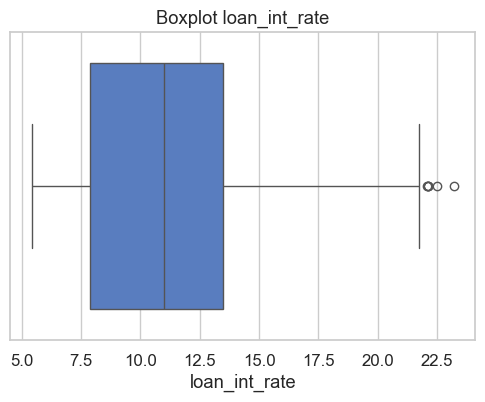

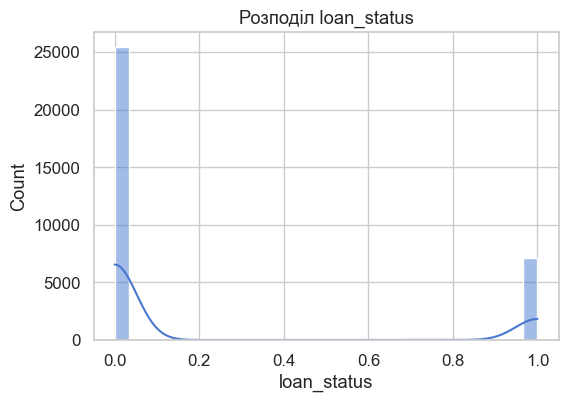

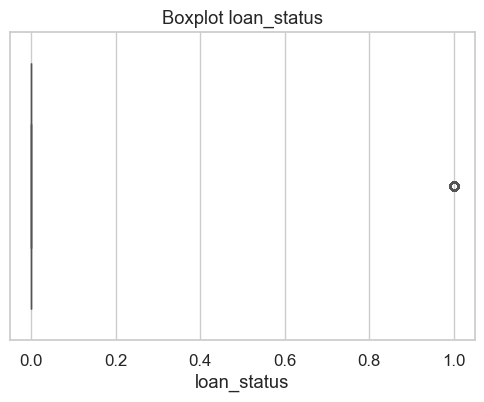

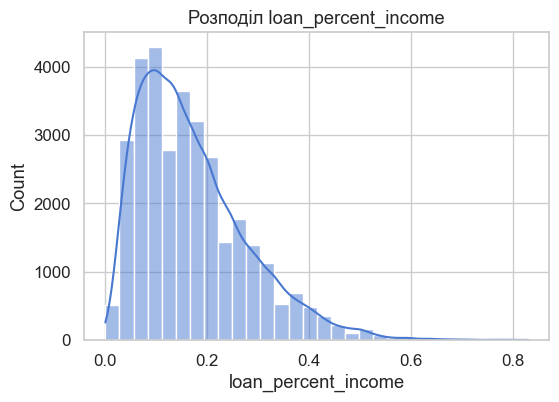

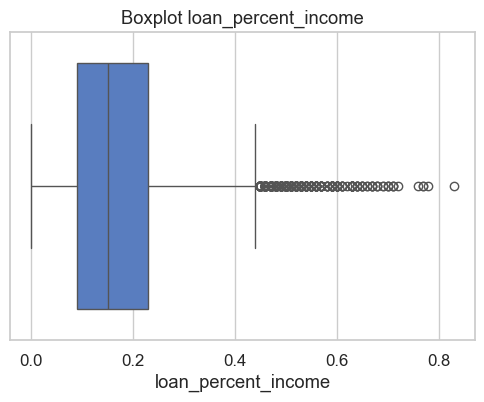

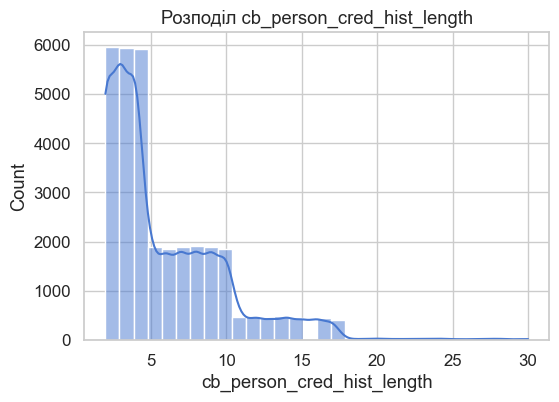

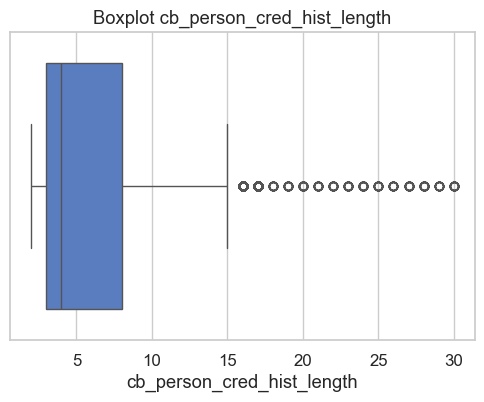

In [19]:
# Розподіл числових змінних
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Розподіл {col}")
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

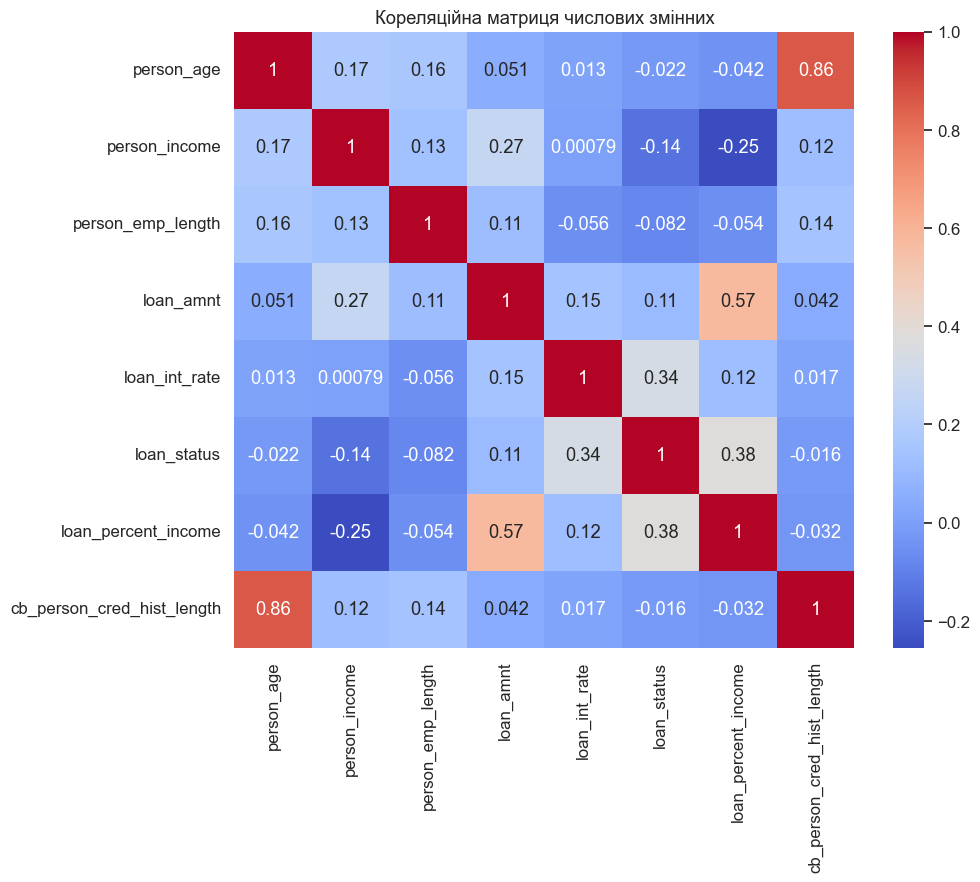

In [20]:
# Кореляції
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця числових змінних")
plt.show()

# 4️⃣ Категоріальні колонки


Категоріальні колонки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


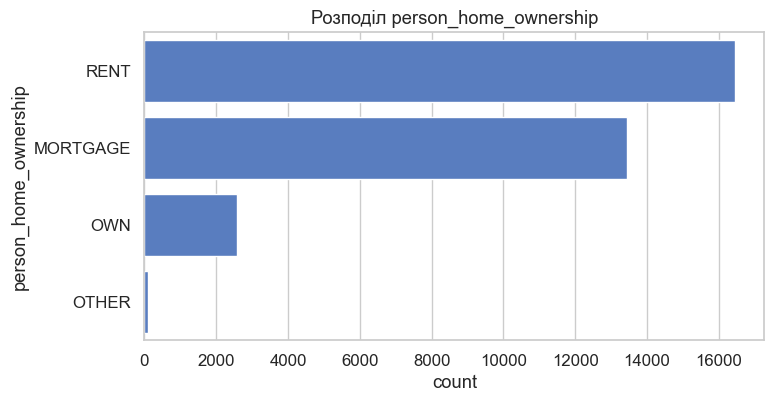

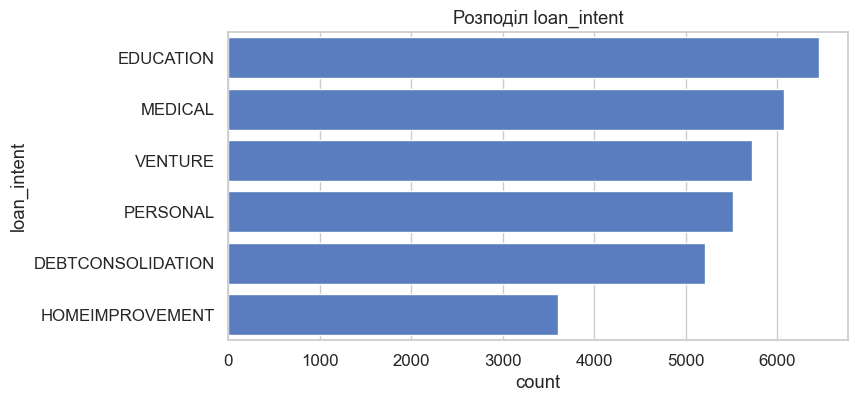

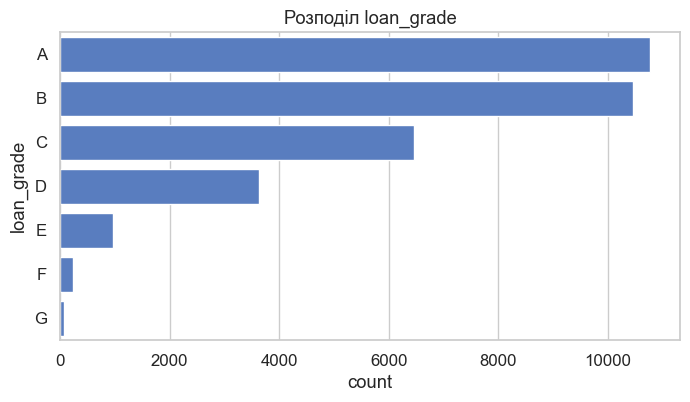

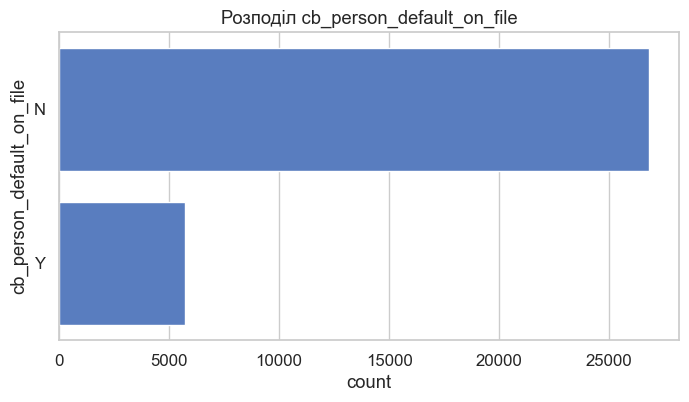

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nКатегоріальні колонки:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Розподіл {col}")
    plt.show()

# 5️⃣ Аналіз Loan Status

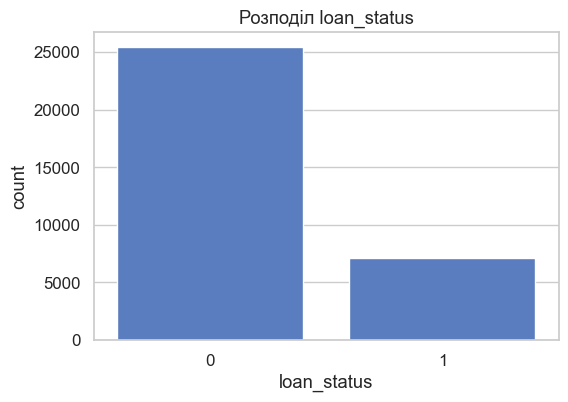

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Розподіл loan_status")
plt.show()

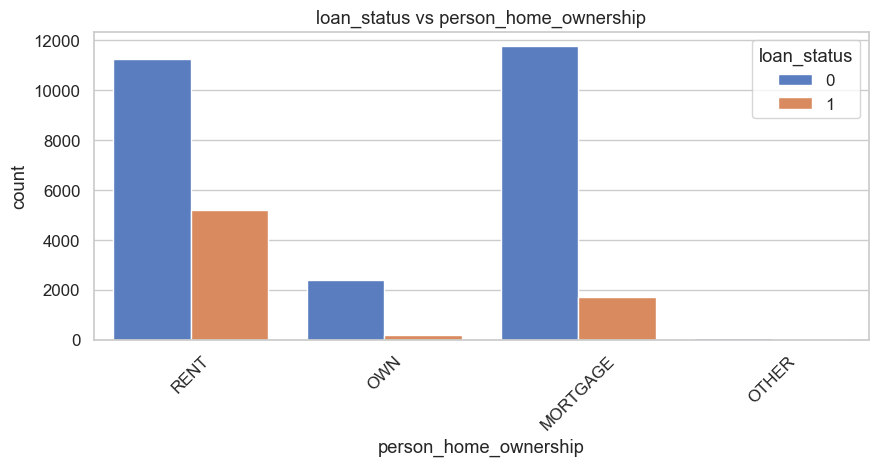

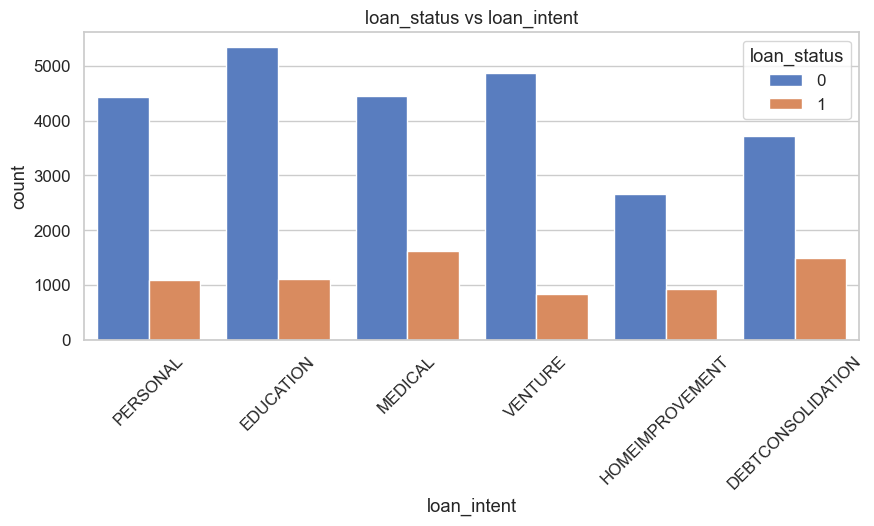

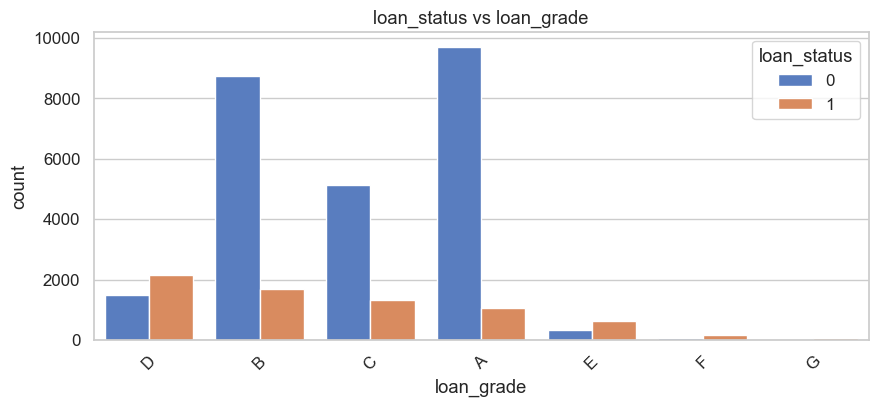

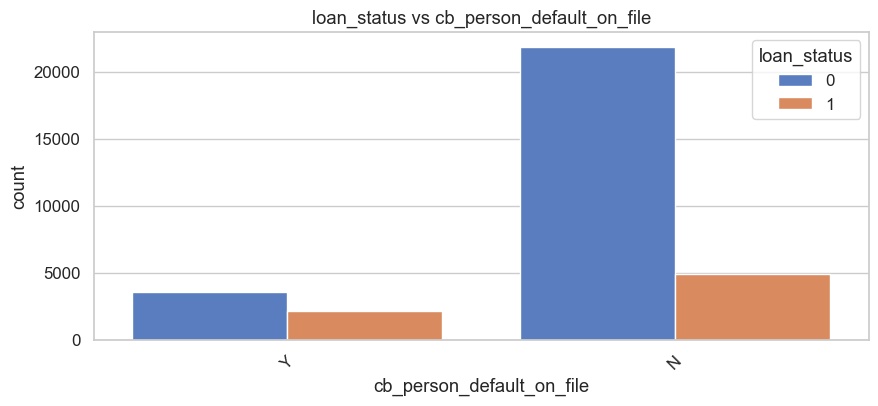

In [23]:
# Вплив категоріальних змінних на loan_status
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f"loan_status vs {col}")
    plt.xticks(rotation=45)
    plt.show()

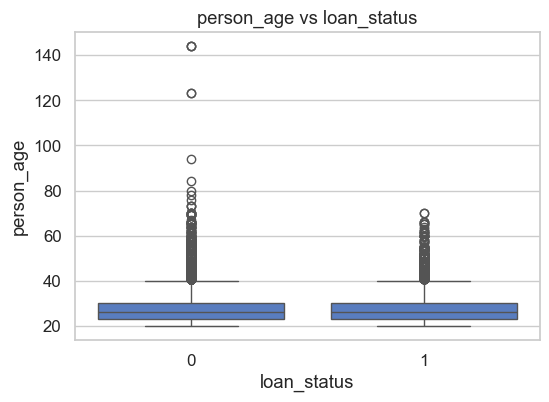

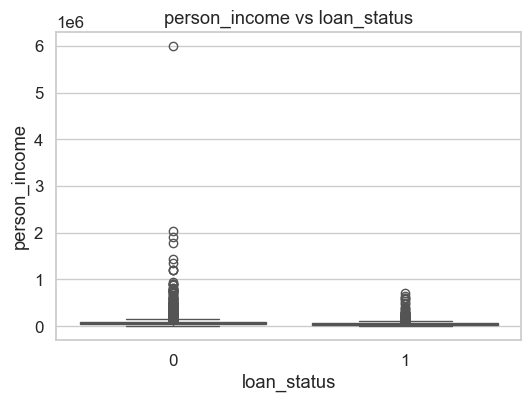

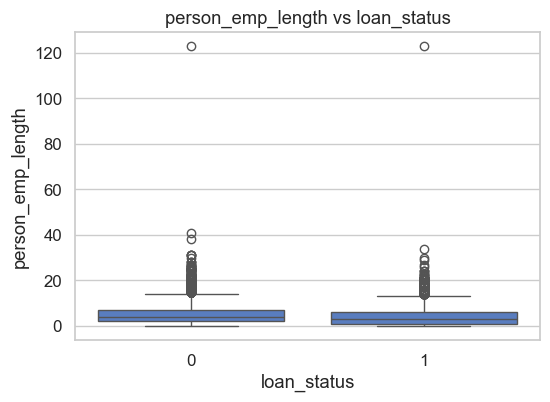

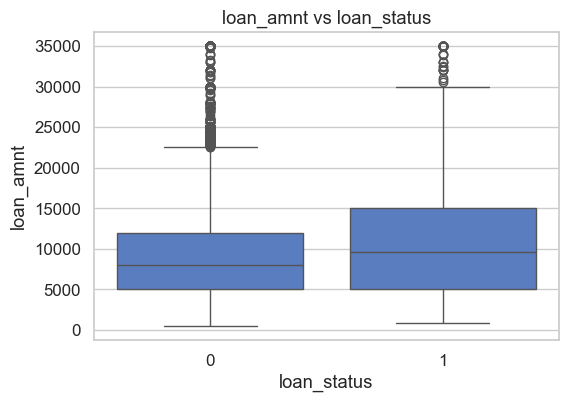

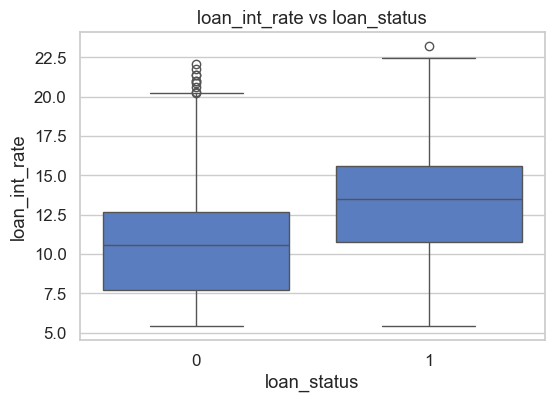

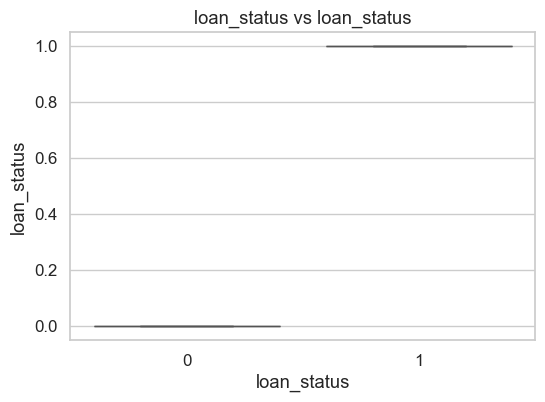

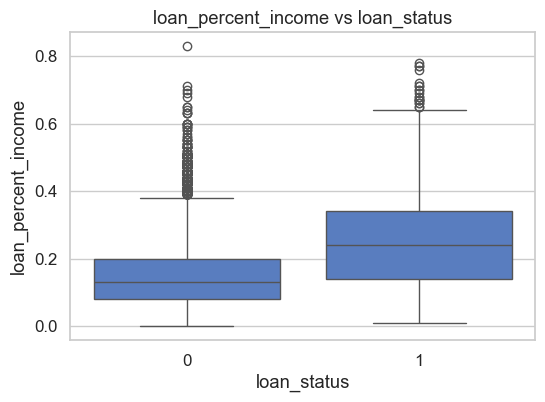

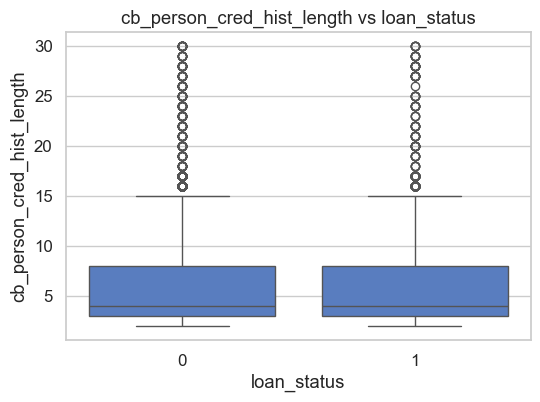

In [24]:
# Вплив числових змінних на loan_status
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs loan_status")
    plt.show()

# 6️⃣ loan_percent_income (0-1)

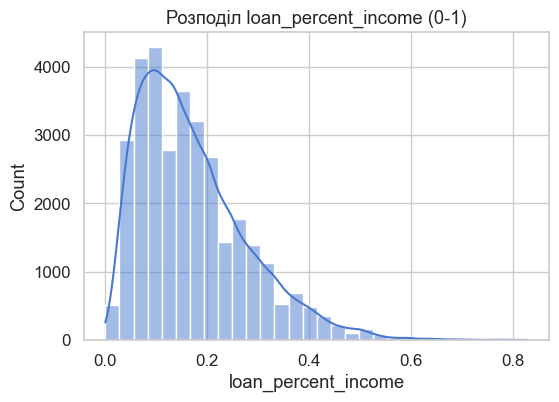

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_percent_income'], bins=30, kde=True)
plt.title("Розподіл loan_percent_income (0-1)")
plt.show()

# 7️⃣ Пропуски та аномалії для person_emp_length і loan_int_rate

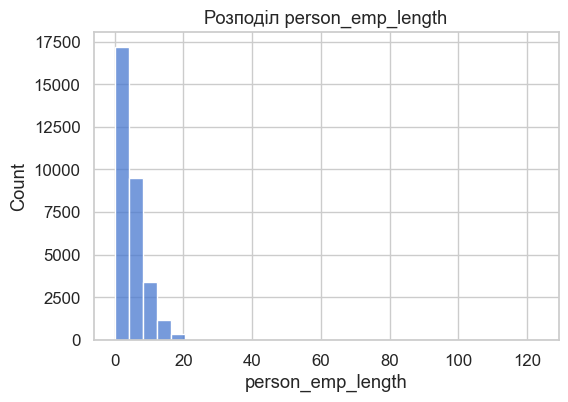

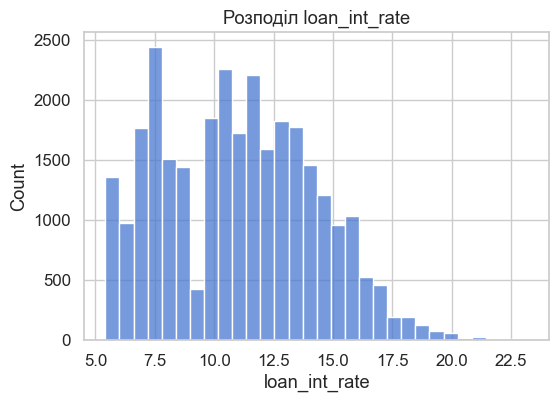

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['person_emp_length'].dropna(), bins=30)
plt.title("Розподіл person_emp_length")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['loan_int_rate'].dropna(), bins=30)
plt.title("Розподіл loan_int_rate")
plt.show()

# 8️⃣ Аналіз взаємозв’язків

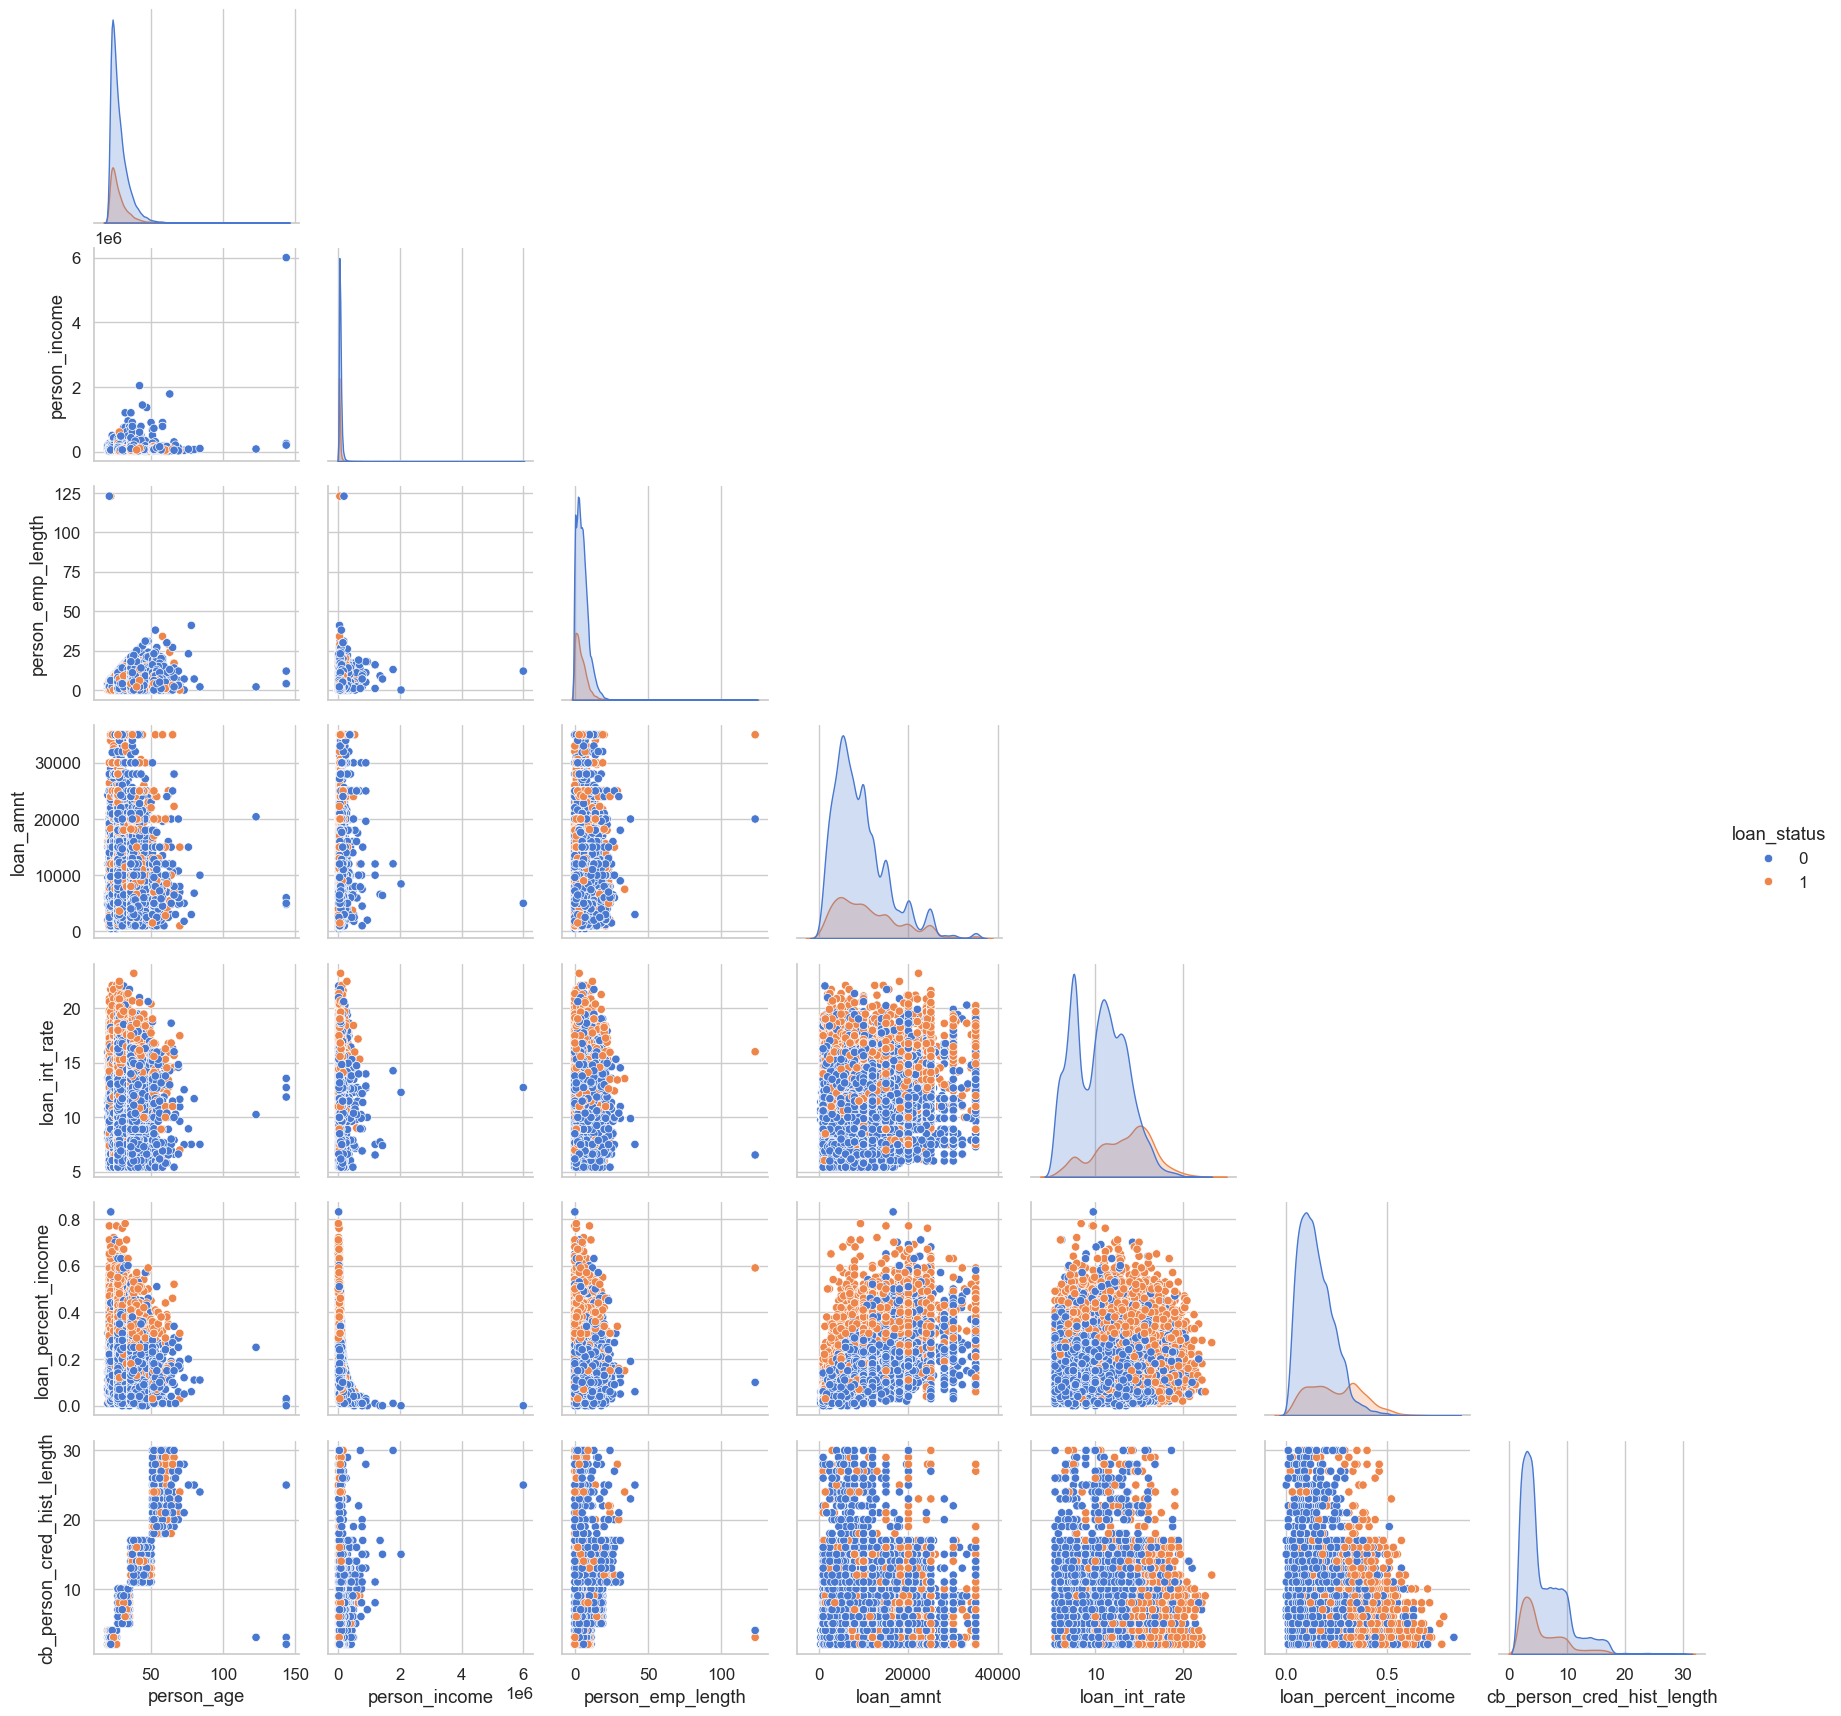

In [28]:
# Вибираємо лише числові колонки, окрім loan_status
num_cols_pairplot = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols_pairplot.remove('loan_status')  # видаляємо target

# Беремо піддатасет без пропусків
df_pairplot = df[num_cols_pairplot + ['loan_status']].dropna()

# Pairplot
sns.pairplot(df_pairplot, hue='loan_status', diag_kind='kde', corner=True)
plt.show()


# 3️⃣ Взаємозв’язки числових змінних з категоріями


Середні значення person_age по person_home_ownership та loan_status:
loan_status                    0          1
person_home_ownership                      
MORTGAGE               28.005955  27.805325
OTHER                  26.878378  26.636364
OWN                    27.705981  27.606218
RENT                   27.627066  27.367488


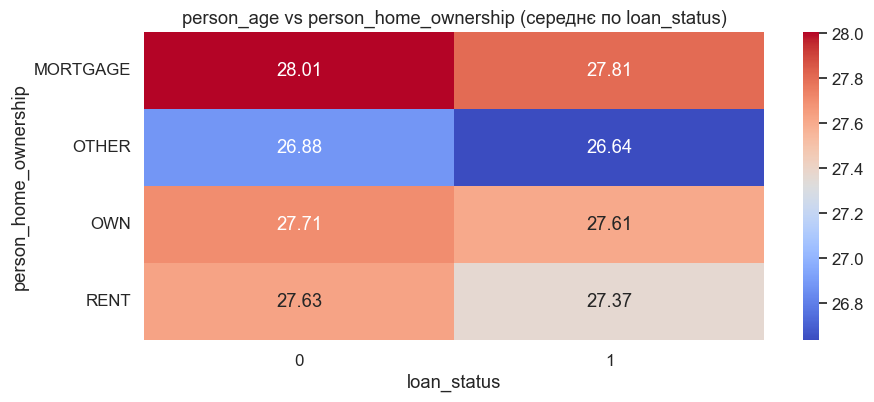


Середні значення person_age по loan_intent та loan_status:
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  27.565019  27.709396
EDUCATION          26.470797  27.152115
HOMEIMPROVEMENT    29.559309  27.671626
MEDICAL            28.079326  27.774830
PERSONAL           28.418720  27.361566
VENTURE            27.695402  26.838253


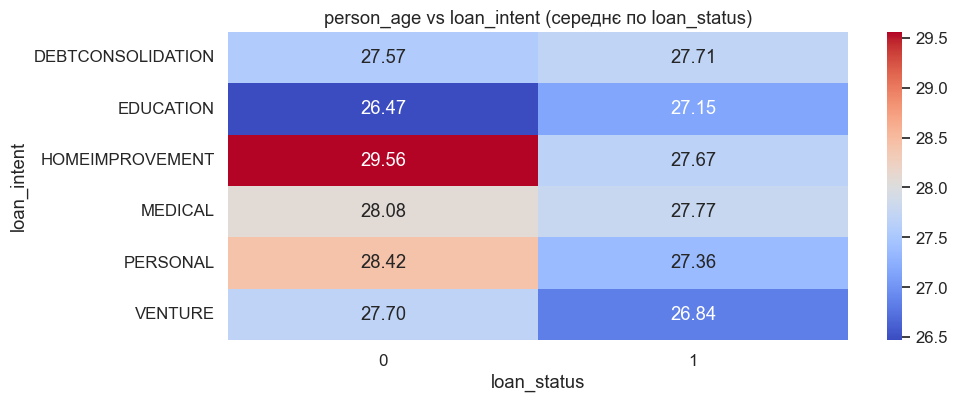


Середні значення person_age по loan_grade та loan_status:
loan_status          0          1
loan_grade                       
A            27.720940  27.150047
B            27.763314  27.288654
C            27.929478  27.307692
D            28.107744  27.717889
E            27.991254  27.800322
F            28.971831  28.094118
G            29.000000  28.428571


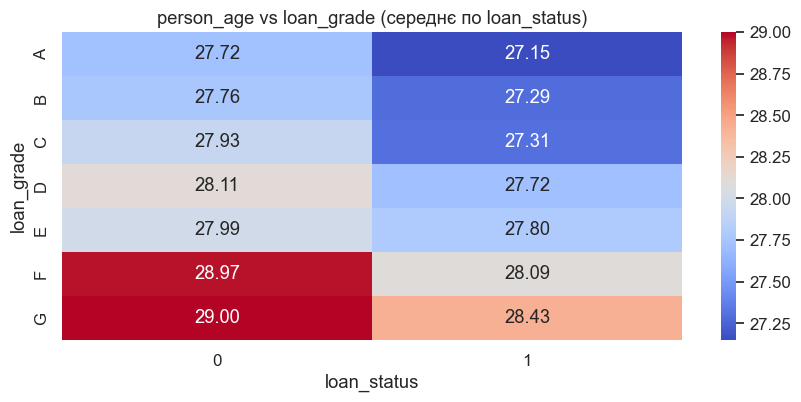


Середні значення person_age по cb_person_default_on_file та loan_status:
loan_status                        0          1
cb_person_default_on_file                      
N                          27.793196  27.381888
Y                          27.892527  27.685543


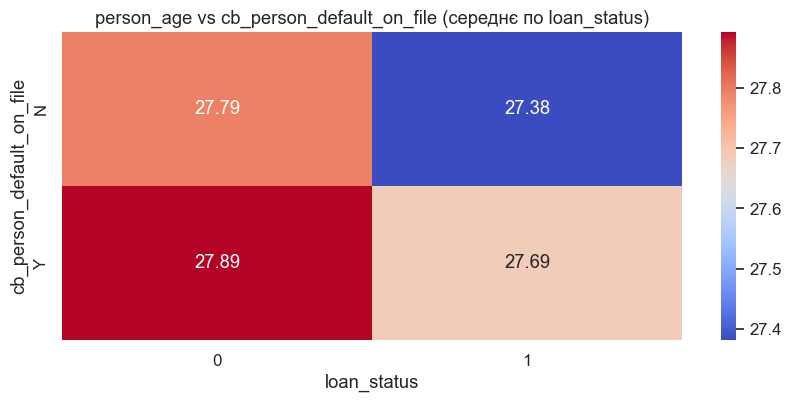


Середні значення person_income по person_home_ownership та loan_status:
loan_status                       0             1
person_home_ownership                            
MORTGAGE               82849.740003  69146.260355
OTHER                  88585.608108  49035.151515
OWN                    60394.305730  26126.274611
RENT                   60318.601208  43464.450116


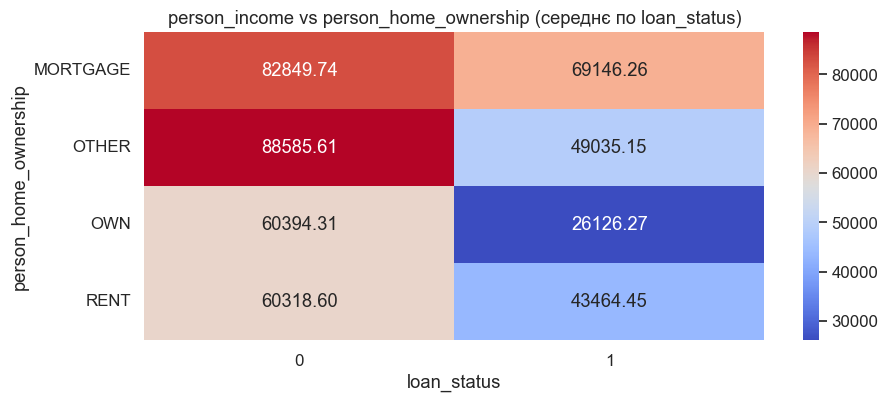


Середні значення person_income по loan_intent та loan_status:
loan_status                   0             1
loan_intent                                  
DEBTCONSOLIDATION  71588.914293  53686.085906
EDUCATION          67745.394796  46776.364536
HOMEIMPROVEMENT    82085.335210  49384.174283
MEDICAL            65422.364494  50497.152375
PERSONAL           73055.192177  46953.377960
VENTURE            70263.073481  44088.696576


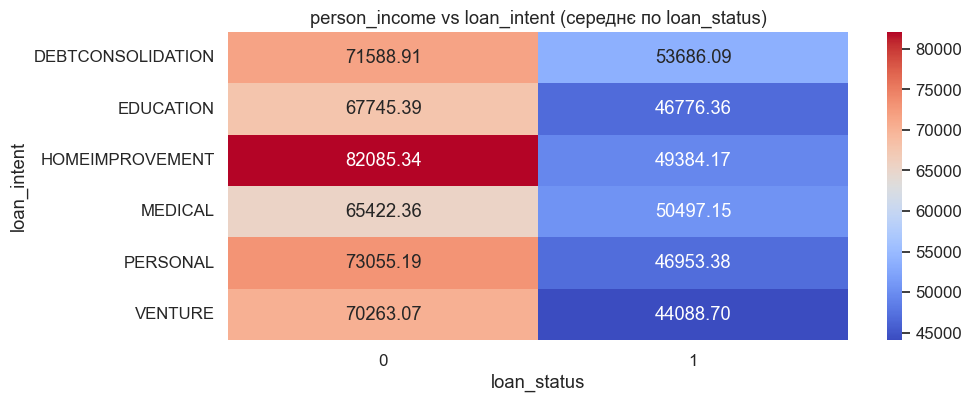


Середні значення person_income по loan_grade та loan_status:
loan_status             0             1
loan_grade                             
A            69779.146538  37529.106244
B            70634.650857  44339.346855
C            70284.075601  44422.465273
D            75692.118519  55320.744979
E            86517.043732  62232.413849
F            91621.746479  70905.647059
G            42000.000000  77325.253968


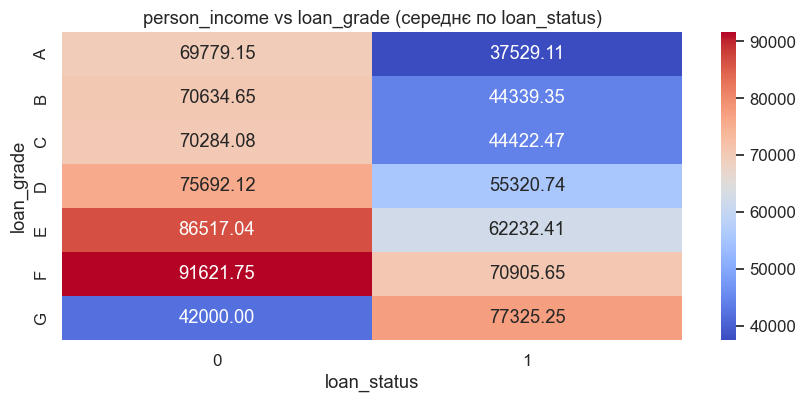


Середні значення person_income по cb_person_default_on_file та loan_status:
loan_status                           0             1
cb_person_default_on_file                            
N                          70576.136164  46666.978728
Y                          72203.224181  54713.134899


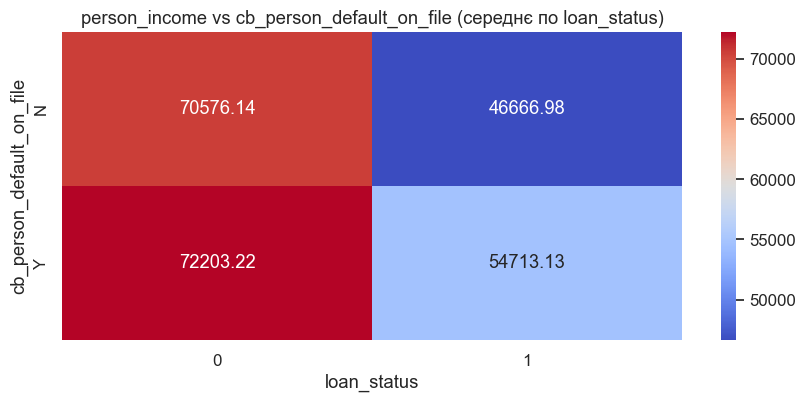


Середні значення person_emp_length по person_home_ownership та loan_status:
loan_status                   0         1
person_home_ownership                    
MORTGAGE               5.902120  5.755828
OTHER                  3.945946  3.090909
OWN                    5.316986  3.161677
RENT                   3.939440  3.649119


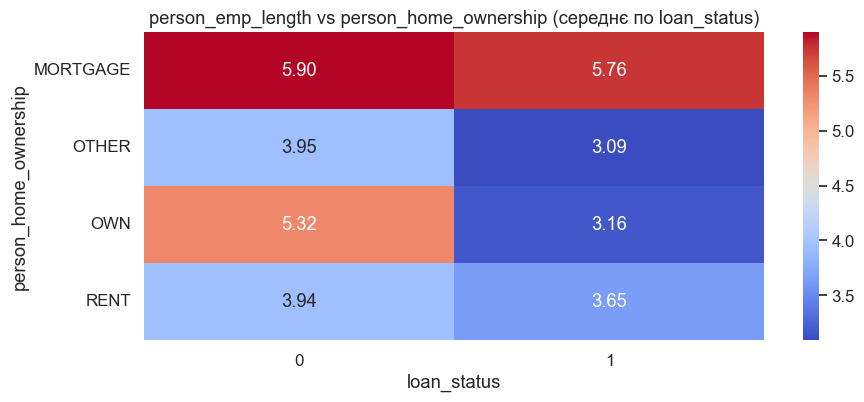


Середні значення person_emp_length по loan_intent та loan_status:
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  4.833471  4.590814
EDUCATION          4.593224  3.830206
HOMEIMPROVEMENT    5.593188  3.797101
MEDICAL            4.817636  4.627476
PERSONAL           5.126330  3.904489
VENTURE            5.136229  3.472973


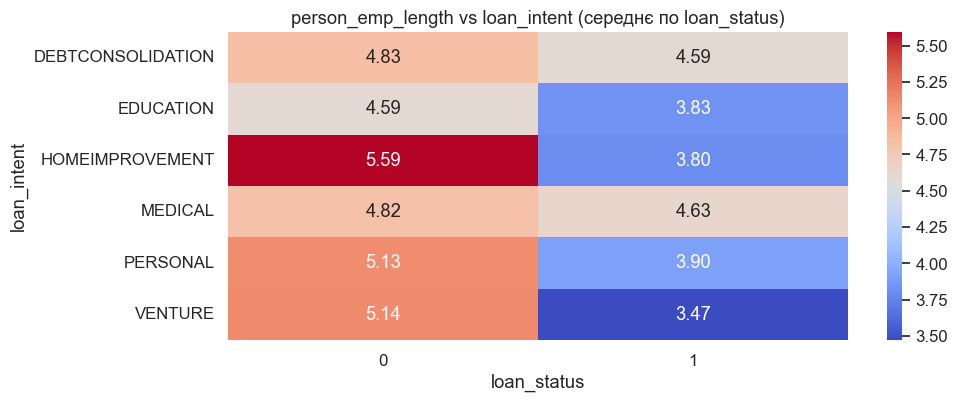


Середні значення person_emp_length по loan_grade та loan_status:
loan_status         0         1
loan_grade                     
A            5.172814  4.431887
B            4.839794  4.305795
C            4.532354  4.127046
D            5.722374  3.990431
E            5.633431  3.675941
F            5.800000  3.602410
G            4.000000  6.158730


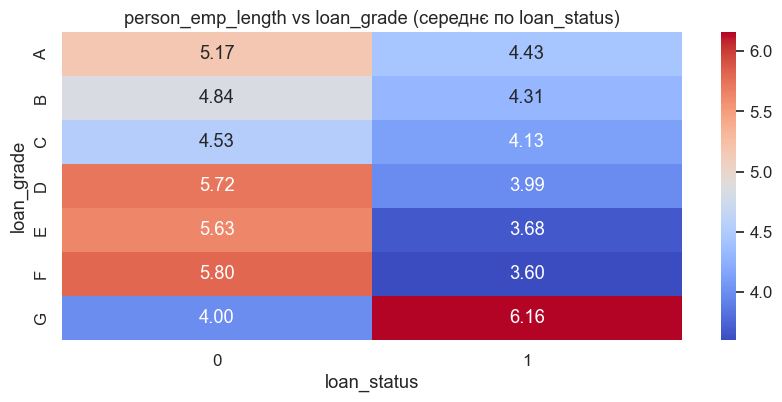


Середні значення person_emp_length по cb_person_default_on_file та loan_status:
loan_status                       0         1
cb_person_default_on_file                    
N                          4.994097  4.158777
Y                          4.814741  4.090307


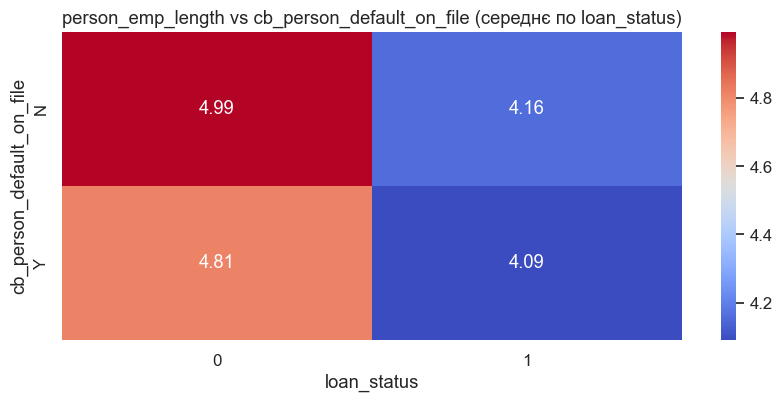


Середні значення loan_amnt по person_home_ownership та loan_status:
loan_status                       0             1
person_home_ownership                            
MORTGAGE               10434.209631  11549.911243
OTHER                  10039.189189  13396.212121
OWN                     9215.892932   6726.295337
RENT                    7986.860227  10759.972072


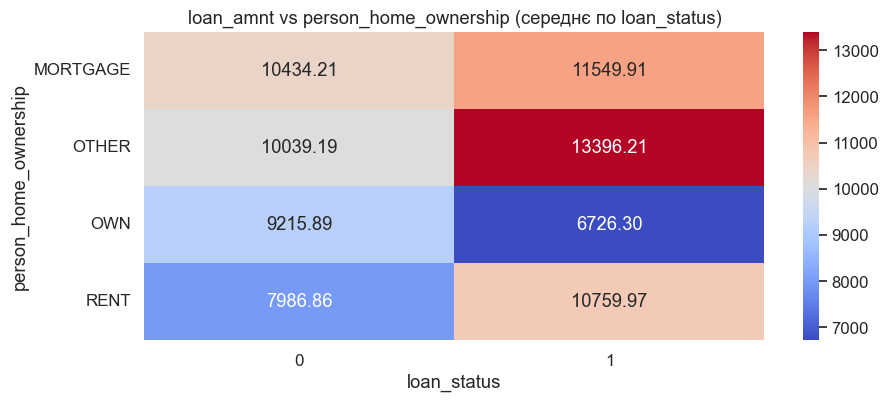


Середні значення loan_amnt по loan_intent та loan_status:
loan_status                   0             1
loan_intent                                  
DEBTCONSOLIDATION   8986.270822  11115.201342
EDUCATION           9179.197866  10941.899190
HOMEIMPROVEMENT    10526.951952   9889.346440
MEDICAL             8554.814607  11194.324491
PERSONAL            9340.718969  10512.568306
VENTURE             9317.944376  11112.868949


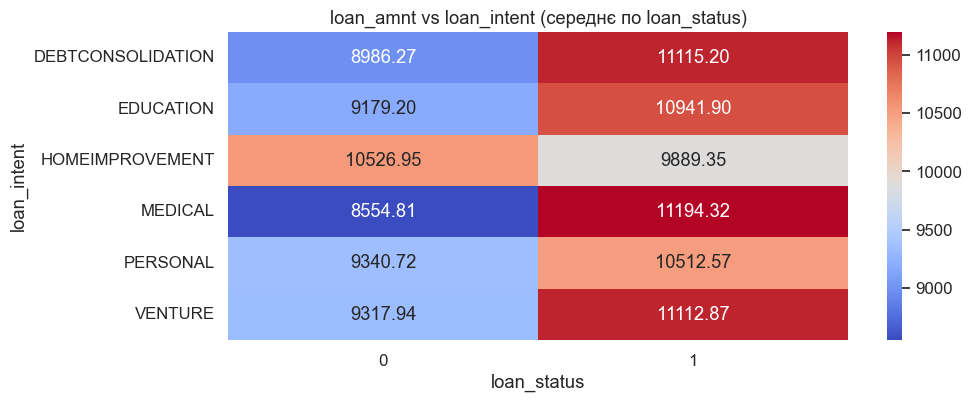


Середні значення loan_amnt по loan_grade та loan_status:
loan_status             0             1
loan_grade                             
A             8432.113046   9508.410997
B             9753.414286  11240.696649
C             8971.190662  10141.598208
D            11137.542088  10649.276039
E            13480.903790  12603.743961
F            14788.732394  14687.500000
G             1600.000000  17443.253968


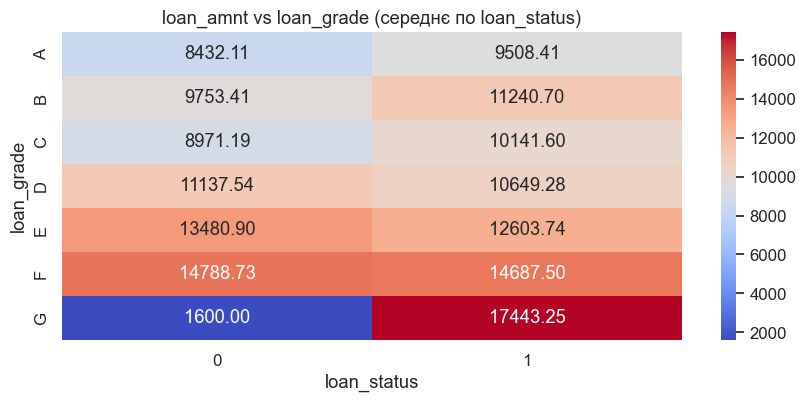


Середні значення loan_amnt по cb_person_default_on_file та loan_status:
loan_status                          0             1
cb_person_default_on_file                           
N                          9170.207763  10827.603323
Y                          9649.699132  10902.543738


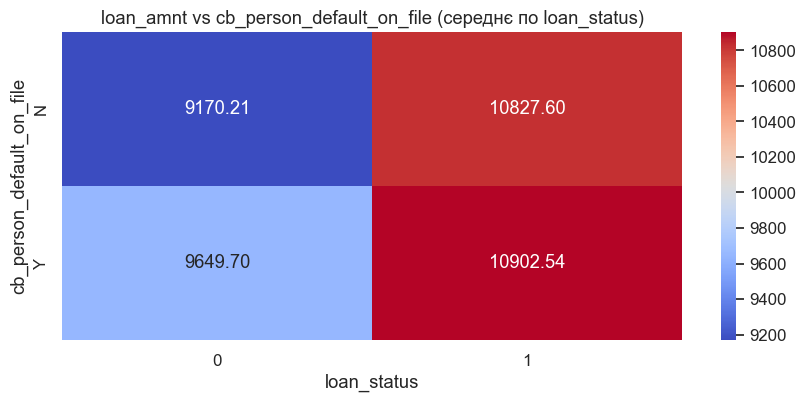


Середні значення loan_int_rate по person_home_ownership та loan_status:
loan_status                    0          1
person_home_ownership                      
MORTGAGE               10.059928  13.431663
OTHER                  11.413582  13.561852
OWN                    10.754801  12.237396
RENT                   10.752531  12.965862


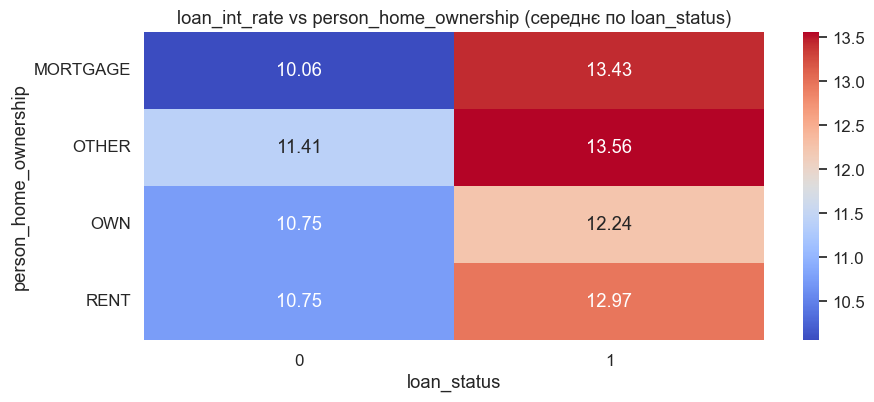


Середні значення loan_int_rate по loan_intent та loan_status:
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  10.014987  13.398217
EDUCATION          10.626655  12.500435
HOMEIMPROVEMENT    10.597985  12.897428
MEDICAL            10.194221  13.403209
PERSONAL           10.590984  12.612653
VENTURE            10.535900  13.320917


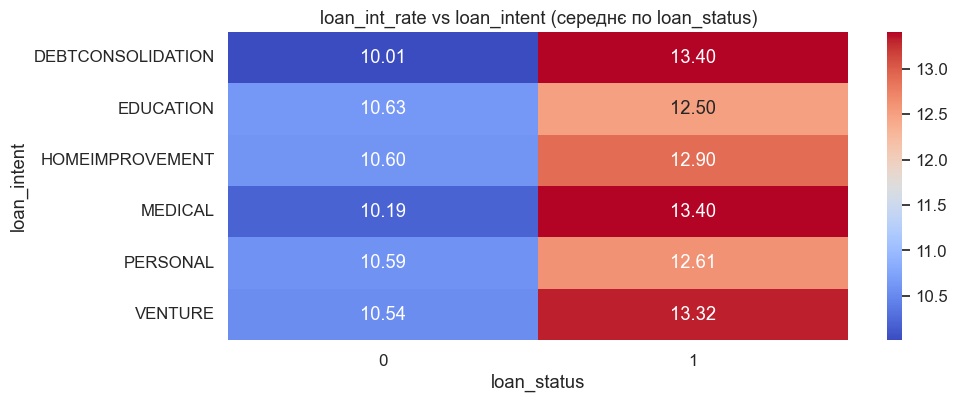


Середні значення loan_int_rate по loan_grade та loan_status:
loan_status          0          1
loan_grade                       
A             7.303224   7.547595
B            10.987726  11.035864
C            13.464246  13.460852
D            15.391206  15.341172
E            16.992935  17.018424
F            18.793750  18.530400
G            19.160000  20.270345


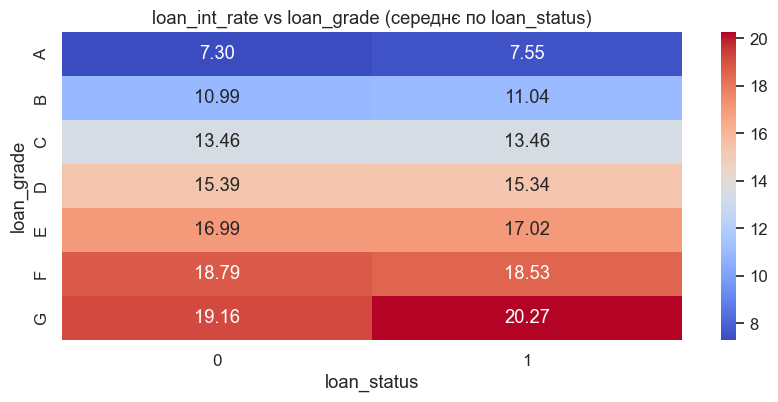


Середні значення loan_int_rate по cb_person_default_on_file та loan_status:
loan_status                        0          1
cb_person_default_on_file                      
N                           9.837381  12.118278
Y                          14.098849  15.190242


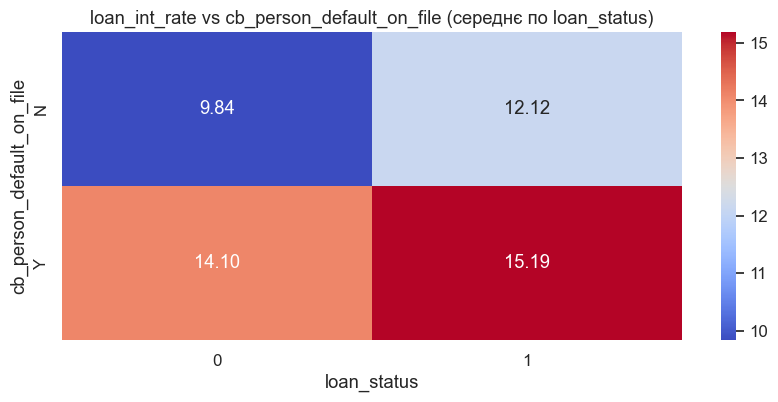

ValueError: Grouper for 'loan_status' not 1-dimensional

In [29]:
for col in num_cols:
    for cat in cat_cols:
        pivot = df.pivot_table(values=col, index=cat, columns='loan_status', aggfunc='mean')
        print(f"\nСередні значення {col} по {cat} та loan_status:")
        print(pivot)

        plt.figure(figsize=(10,4))
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"{col} vs {cat} (середнє по loan_status)")
        plt.show()